<a href="https://colab.research.google.com/github/NhatHuy2k2/AI/blob/main/Week3_skfuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-fuzzy > /dev/null 2>&1

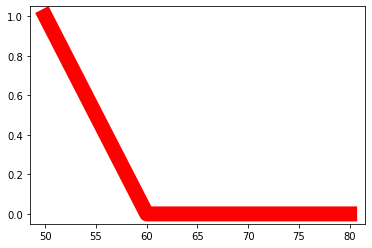

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(50, 81, 1)
sLow = fuzz.trimf(x,[50, 50, 60])
plt.figure()
plt.plot(x,sLow,'r',linewidth =15,label = 'sLow')


ValueError: ignored

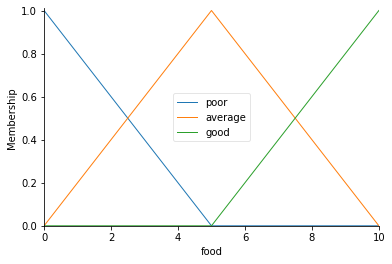

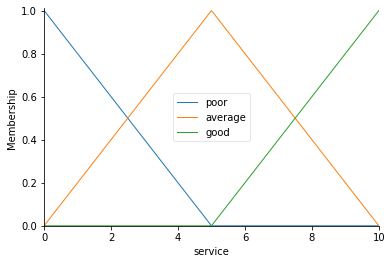

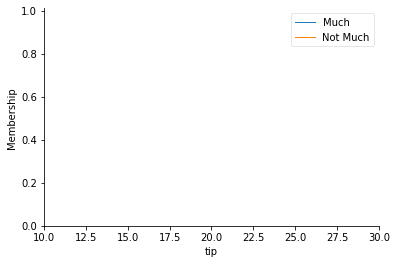

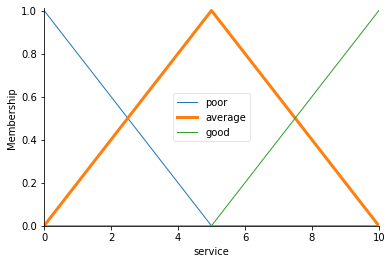

In [36]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(universe = np.arange(0,11,1),label = 'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
power = ctrl.Consequent(np.arange(10,31,1),'powerOn')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['Much']=fuzz.trimf(tip.universe,[0,0,5])
tip['Not Much']=fuzz.trimf(tip.universe,[0,5,10])

food.view()
service.view()
tip.view()
service['average'].view()

rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['Not Much'])
rule2 = ctrl.Rule(food['poor'] & service['average'],tip['Not Much'])
rule3 = ctrl.Rule(food['poor'] & service['good'],tip['Not Much'])

rule4 = ctrl.Rule(food['average']& service['poor'],tip['Not Much'])
rule5 = ctrl.Rule(food['average']& service['average'],tip['Not Much'])
rule6 = ctrl.Rule(food['average']& service['good'],tip['Much'])

rule7 = ctrl.Rule(food['good']& service['poor'],tip['Not Much'])
rule8 = ctrl.Rule(food['good']& service['average'],tip['Much'])
rule9 = ctrl.Rule(food['good']& service['good'],tip['Much'])

powerOn_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
powerOn = ctrl.ControlSystemSimulation(powerOn_ctrl)
powerOn.input['food'] = 10
powerOn.input['service'] = 10
powerOn.compute()
print(powerOn.output['tip'])
tip.view(sim=powerOn)  

Power value: 29.07940168148587


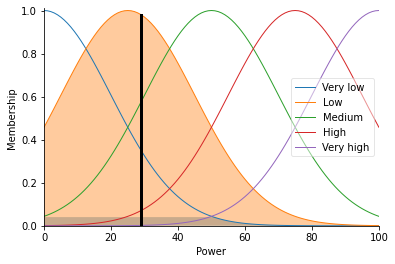

In [39]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Time = ctrl.Antecedent(np.arange(10,301,1),label = 'Time')
Rice = ctrl.Antecedent(np.arange(100,2001,1),'Rice')
Power = ctrl.Consequent(np.arange(0,101,1),'Power')

Time['Very fast'] = fuzz.trimf(Time.universe,[10,10,20])
Time['Fast'] = fuzz.trapmf(Time.universe,[15,20,25,30])
Time['Medium'] = fuzz.trapmf(Time.universe,[25,30,40,45])
Time['Slow'] = fuzz.trapmf(Time.universe,[40,50,60,70])
Time['Very slow'] = fuzz.trimf(Time.universe,[60,300,300])
#Time.view()

Rice['A lot'] = fuzz.trimf(Rice.universe,[1000,2000,2000])
Rice['Much'] = fuzz.gaussmf(Rice.universe,500,200)
Rice['Medium'] = fuzz.gaussmf(Rice.universe,240,150)
Rice['Not Much'] = fuzz.gaussmf(Rice.universe,120,150)
Rice['A little'] = fuzz.trimf(Rice.universe,[100,100,200])
#Rice.view()

Power['Very low'] = fuzz.gaussmf(Power.universe,0,20)
Power['Low'] = fuzz.gaussmf(Power.universe,25,20)
Power['Medium'] = fuzz.gaussmf(Power.universe,50,20)
Power['High'] = fuzz.gaussmf(Power.universe,75,20)
Power['Very high'] = fuzz.gaussmf(Power.universe,100,20)
#Power.view()

rule1 = ctrl.Rule(Time['Very fast'] & Rice['A little'],Power['Low'])
rule2 = ctrl.Rule(Time['Very fast'] & Rice['Not Much'],Power['Medium'])
rule3 = ctrl.Rule(Time['Very fast'] & Rice['Medium'],Power['High'])
rule4 = ctrl.Rule(Time['Very fast'] & Rice['Much'],Power['High'])
rule5 = ctrl.Rule(Time['Very fast'] & Rice['A lot'],Power['Very high'])
rule6 = ctrl.Rule(Time['Fast'] & Rice['A little'],Power['Very low'])
rule7 = ctrl.Rule(Time['Fast'] & Rice['Not Much'],Power['Low'])
rule8 = ctrl.Rule(Time['Fast'] & Rice['Medium'],Power['Low'])
rule9 = ctrl.Rule(Time['Fast'] & Rice['Much'],Power['Medium'])
rule10 = ctrl.Rule(Time['Fast'] & Rice['A lot'],Power['Medium'])
rule11 = ctrl.Rule(Time['Medium'] & Rice['A little'],Power['Very low'])
rule12 = ctrl.Rule(Time['Medium'] & Rice['Not Much'],Power['Very low'])
rule13 = ctrl.Rule(Time['Medium'] & Rice['Medium'],Power['Low'])
rule14 = ctrl.Rule(Time['Medium'] & Rice['Much'],Power['Medium'])
rule15 = ctrl.Rule(Time['Medium'] & Rice['A lot'],Power['Medium'])
rule16 = ctrl.Rule(Time['Slow'] & Rice['A little'],Power['Very low'])
rule17 = ctrl.Rule(Time['Slow'] & Rice['Not Much'],Power['Very low'])
rule18 = ctrl.Rule(Time['Slow'] & Rice['Medium'],Power['Low'])
rule19= ctrl.Rule(Time['Slow'] & Rice['Much'],Power['Low'])
rule20 = ctrl.Rule(Time['Slow'] & Rice['A lot'],Power['Medium'])
rule21 = ctrl.Rule(Time['Very slow'] & Rice['A little'],Power['Very low'])
rule22 = ctrl.Rule(Time['Very slow'] & Rice['Not Much'],Power['Very low'])
rule23 = ctrl.Rule(Time['Very slow'] & Rice['Medium'],Power['Low'])
rule24= ctrl.Rule(Time['Very slow'] & Rice['Much'],Power['Low'])
rule25 = ctrl.Rule(Time['Very slow'] & Rice['A lot'],Power['Medium'])

powerOn_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powerOn=ctrl.ControlSystemSimulation(powerOn_ctrl)
powerOn.input['Time']=50
powerOn.input['Rice']=500
powerOn.compute()
print('Power value:',powerOn.output['Power'])
Power.view(sim=powerOn)

